**DEATH PREDICT**

*Predicting heart failure in hospital ICU (Intensive car Unit)*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/in-hospital-mortality-prediction/data01.csv


In [2]:
# Read CSV file into DataFrame df
df = pd.read_csv('/kaggle/input/in-hospital-mortality-prediction/data01.csv', index_col=0)
# Show dataframe
df

,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
group,,,,,,,,,,,,,,,,,,,,,
1,125047,0.0,72,1,37.588179,0,0,0,1,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,139812,0.0,75,2,NaN,0,0,0,0,1,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
1,109787,0.0,83,2,26.572634,0,0,0,0,1,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
1,130587,0.0,43,2,83.264629,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
1,138290,0.0,75,2,31.824842,1,0,0,0,1,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,171130,0.0,62,1,25.516870,1,1,0,1,0,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
2,101659,0.0,78,1,25.822710,0,1,0,1,0,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
2,162069,0.0,85,2,23.891779,1,1,0,1,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55


<AxesSubplot:title={'center':'Frequency of Heart Failures'}, xlabel='Heart Failure', ylabel='frequency'>

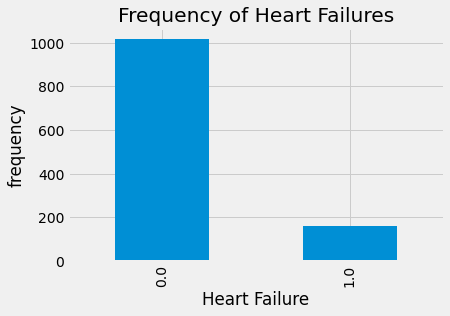

In [3]:
df['outcome'].value_counts().plot(kind='bar', title='Frequency of Heart Failures', xlabel='Heart Failure', ylabel='frequency')

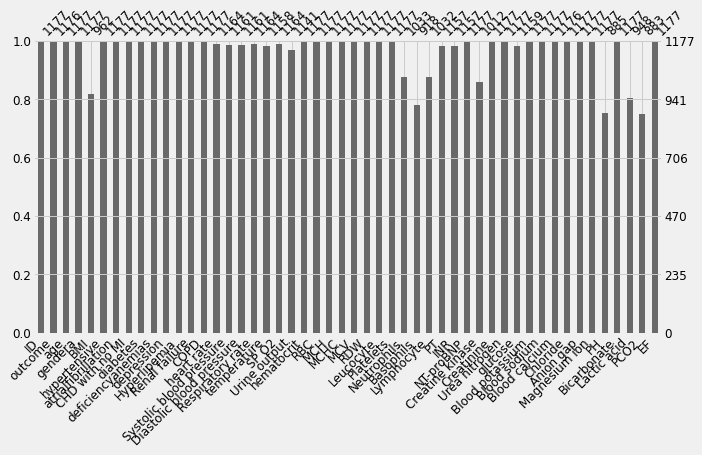

In [4]:
import missingno
# missing value visualisation
missingno.bar(df, figsize=(10,5), fontsize=12);

In [5]:
# One outcome value to nan: to delete
# drop rows
# from dataFrame where outcome is nan
df = df.dropna(subset=['outcome'])
df = df.reset_index(drop=True)

In [6]:
# Average Age of non-surviving patients 
deads = df[df.outcome == 1]
print(np.mean(deads.age))

76.23899371069183


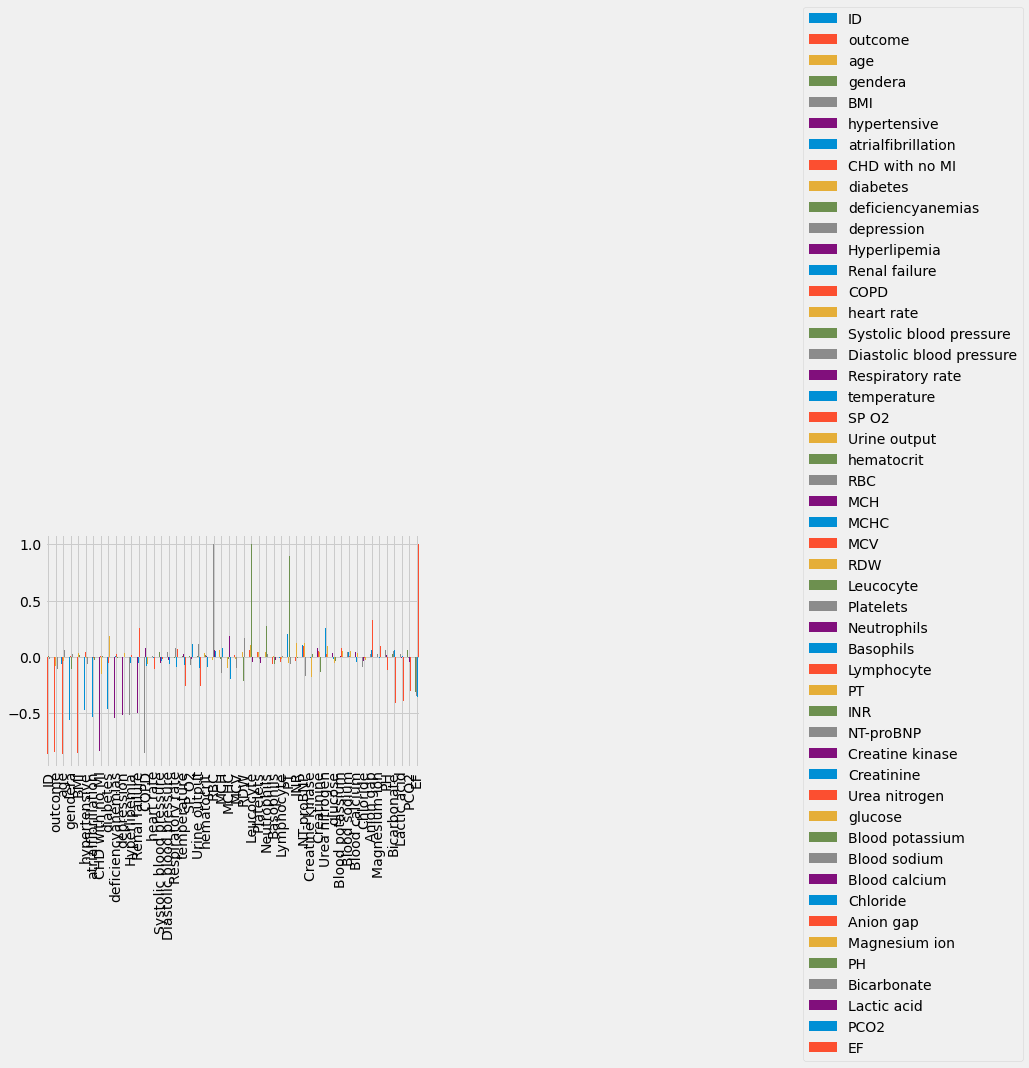

In [7]:
corr = df.corr(method = 'kendall')
corrabs = corr.iloc[0,:].map(abs)
corr.plot.bar().legend(loc='center left',bbox_to_anchor=(2.0, 1.0))

Text(0.5, 1.0, 'Correlation between different features')

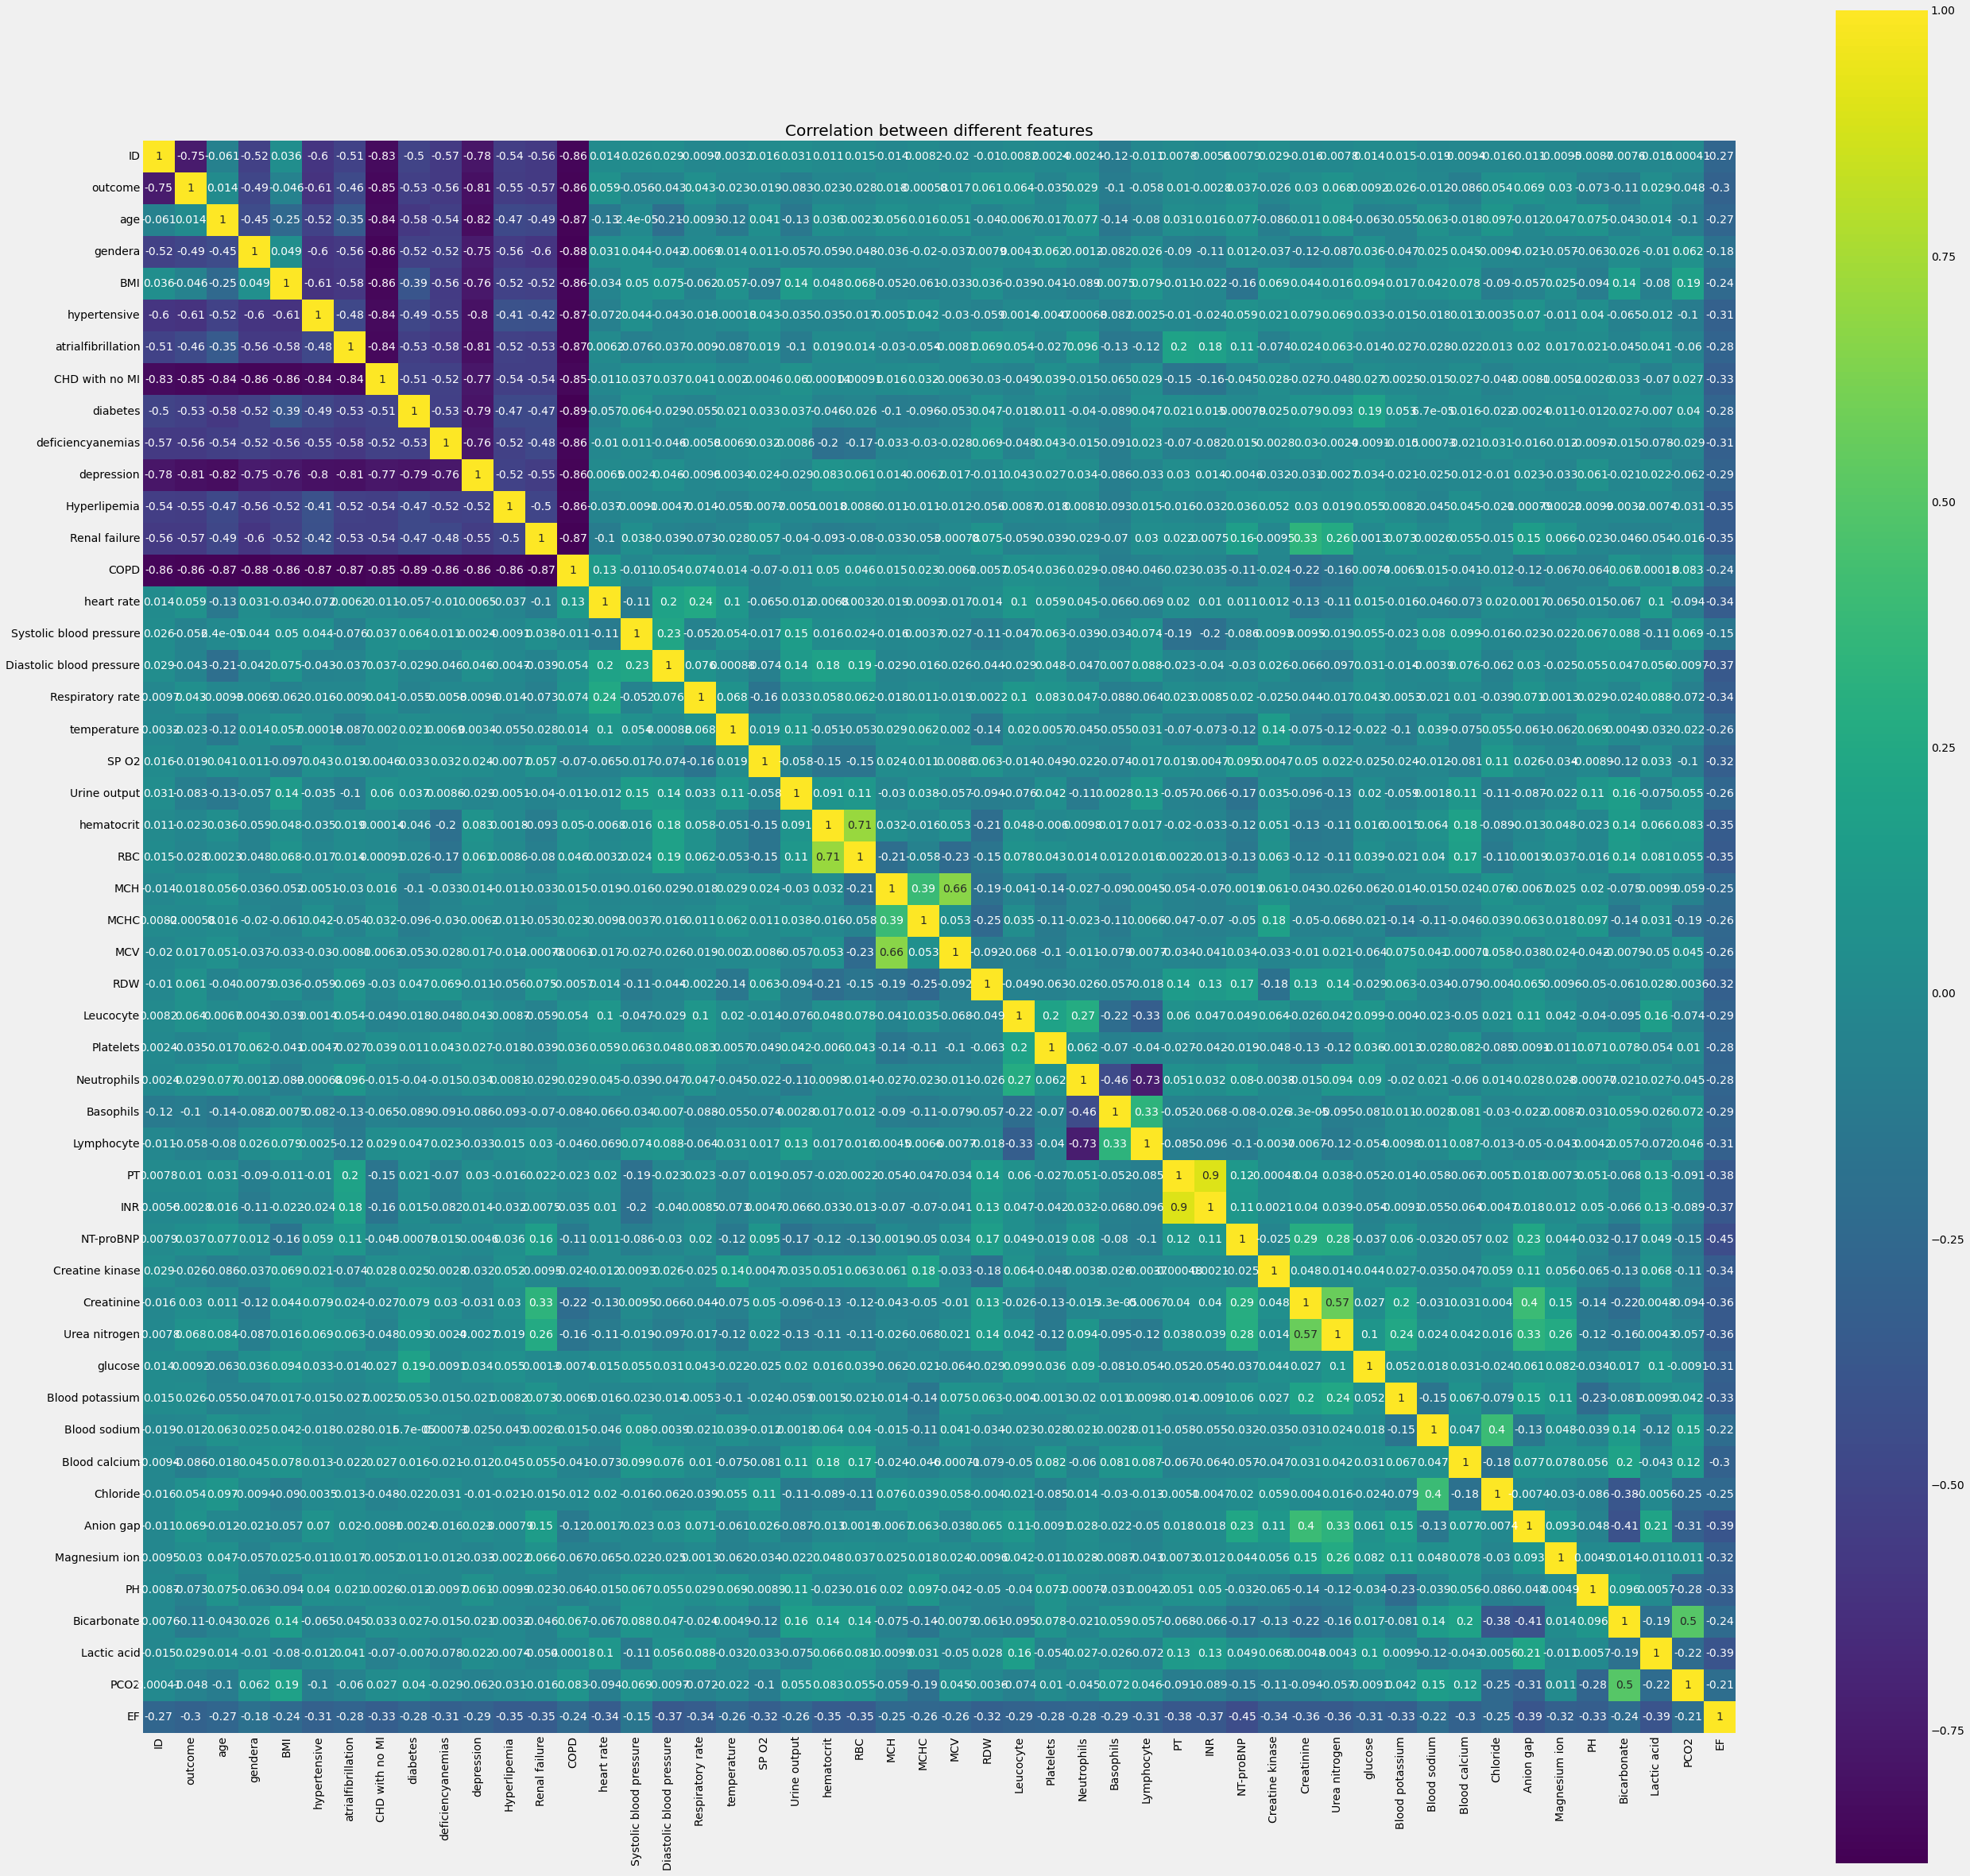

In [8]:
import seaborn as sns
correlation = corr
plt.figure(figsize=(40,40))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different features')

<AxesSubplot:ylabel='Frequency'>

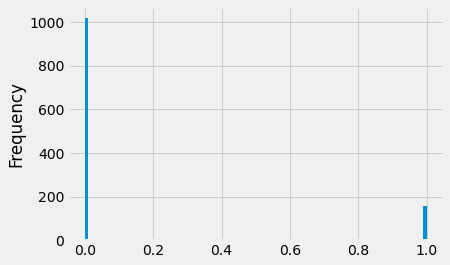

In [9]:
df['outcome'].plot(kind='hist', legend=None, bins=100)

**we can see that 13% of all patients died of heart failure during the study, which is not evenly balanced**

**DEAL WITH NAN**

In [10]:
# create features (data to train)

features = df.iloc[:, 2:]

# Eliminate Nan values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
X_impute = imputer.fit_transform(features)

from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X_impute)
X = X_scale

In [11]:
# create the labels (ground truth)
labels = df['outcome']
y = np.ravel(labels)

In [12]:
# creating train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = 42)

In [13]:
# weight the two classes because of unbalanced data 
from collections import Counter

num_patients = df.shape[0]
dicto = labels.value_counts().to_dict()
counter = Counter(dicto)
max_val = float(max(counter.values()))
class_weight = {class_id : max_val/num_patients for class_id, num_patients in counter.items()}
print(class_weight)

{0.0: 1.0, 1.0: 6.39622641509434}


**DECISION TREE**

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#instanciation of the decision tree
model = DecisionTreeClassifier(class_weight = class_weight)

In [15]:
#train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0.0: 1.0, 1.0: 6.39622641509434})

In [16]:
# get the models predicted outcome (death)
y_predictions = (model.predict(X_test) > 0.5).astype("int32")

In [17]:
score = model.score(X_test, y_test)
score

0.8149100257069408

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       330
         1.0       0.31      0.19      0.23        59

    accuracy                           0.81       389
   macro avg       0.59      0.56      0.56       389
weighted avg       0.78      0.81      0.79       389



In [19]:
from sklearn.metrics import confusion_matrix

number_train = 30
summ = 0
sum_mat = np.zeros((2,2))
for seed in range(number_train):
    # split traing and test data in two subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = seed)

    #instanciation of the decision tree
    model = RandomForestClassifier(max_depth=8, random_state=seed, class_weight=class_weight)

    #train the model
    model.fit(X_train, y_train)

    # get the models predicted outcome
    y_predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    sum_mat += confusion_matrix(y_test, y_predictions)
    summ += score

print('accuracy: ' + str(summ/number_train))
print("Confusion matrix:")
print(np.round_(sum_mat/number_train))

accuracy: 0.8757497857754928
Confusion matrix:
[[335.   2.]
 [ 46.   5.]]


THE DECISION TREE GIVES A BETTER PREDICTION THAN OUR INITIAL NEURAL NETWORK : ~80% instead of ~40%

Confusion Matrix for binary classification problems has the below-mentioned structure.

[[TN, FP ]

 [FN, TP ]]

* TN refers to True Negative which is the count of labels which were originally belonged to negative class and model also predicted them as negative.
* FP refers to False positive which is the count of labels which were actually belonged to negative class but model predicted them as positive.
* FN refers to False Negative which is the count of labels which were actually belonged to Positive Class but model predicted them as negative.
* TP refers to True Positive which is the count of labels predicted positive which were actually positive.

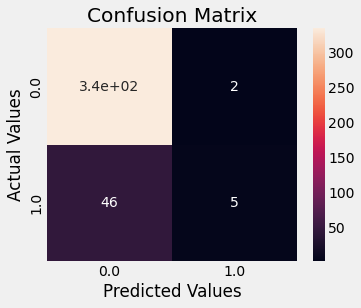

In [20]:
from sklearn.metrics import confusion_matrix
classes_str = {0.0, 1.0}
conf_mat = np.round_(sum_mat/number_train)

def print_conf_mat(conf_mat, classes_str):
    # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
    cm_df = pd.DataFrame(conf_mat,
                         index = classes_str, 
                         columns = classes_str)
    import seaborn as sns
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
print_conf_mat(conf_mat, classes_str)

**MLP**

In [21]:
col = ['age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF']
X_t = pd.DataFrame(data = X_train, columns=col )

2021-12-08 15:31:38.638275: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-12-08 15:31:38.638390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


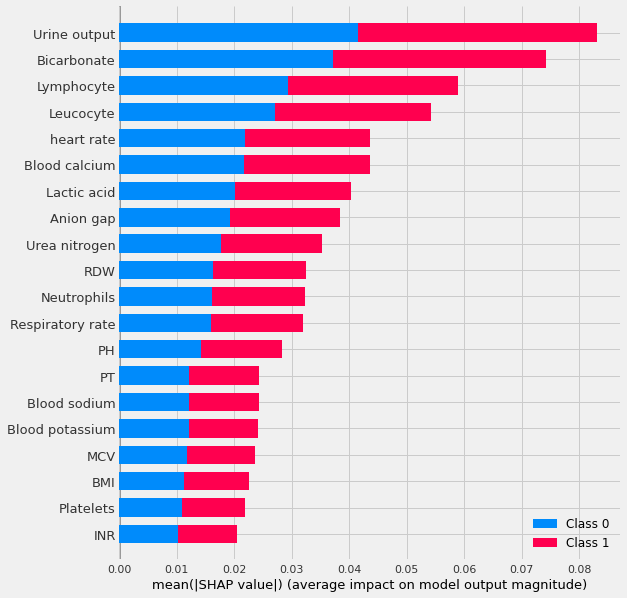

In [22]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_t, plot_type="bar")

In [23]:
# Get the predictions and put them with the test data.
X_output = pd.DataFrame(data = X_test, columns=col )
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,389,50) # Every 50 rows
S = X_output.iloc[random_picks]
S


,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,...,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,predict
1,0.592068,-1.052391,-0.660003,0.627188,-0.907334,-0.306518,-0.852568,1.395481,-0.367607,1.277056,...,0.347345,0.070255,0.405773,-1.273497,0.008121,-0.370027,-0.049270,-0.134837,-0.288334,0.0
51,1.038779,0.950217,-0.169594,0.627188,1.102129,-0.306518,-0.852568,-0.716599,-0.367607,1.277056,...,-1.628305,0.918076,0.757664,-0.875884,-1.287784,-1.582735,1.810028,-0.696892,-1.065508,1.0
101,0.815423,0.950217,-0.173040,0.627188,1.102129,-0.306518,1.172927,1.395481,-0.367607,1.277056,...,-0.765521,-3.164751,-1.393671,0.430559,-0.704132,1.195703,-0.085079,1.424866,0.488840,0.0
151,0.368713,-1.052391,0.757471,0.627188,-0.907334,-0.306518,-0.852568,-0.716599,-0.367607,1.277056,...,0.422369,-0.078212,-0.442536,0.316955,-0.515705,0.065386,-0.736797,0.390082,0.488840,0.0
201,1.113230,0.950217,-0.535785,0.627188,1.102129,-0.306518,-0.852568,-0.716599,-0.367607,1.277056,...,0.269541,-0.101654,-0.793856,-0.014389,1.155639,-0.070955,-0.586400,-0.851457,0.488840,0.0
251,-0.226900,-1.052391,-1.196381,-1.594418,1.102129,-0.306518,-0.852568,-0.716599,-0.367607,-0.783051,...,-0.948081,1.773712,0.405773,0.051880,-1.800775,-1.144096,-0.693826,0.455321,0.488840,0.0
301,-0.152449,0.950217,2.611587,0.627188,1.102129,-0.306518,-0.852568,-0.716599,-0.367607,1.277056,...,-1.797110,0.470333,-0.800711,0.157910,0.060880,-1.337614,-0.693826,-1.146536,0.488840,0.0
351,0.368713,0.950217,-1.033606,-1.594418,1.102129,-0.306518,-0.852568,-0.716599,-0.367607,-0.783051,...,-0.152820,0.028580,-1.186116,-0.307866,-1.036517,1.823168,-0.371548,2.428135,-1.065508,0.0


In [24]:
shap.initjs()
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values = explainerModel.shap_values(S.iloc[j,:-1])
    #p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    p = shap.force_plot(explainerModel.expected_value[j], shap_values[j], feature_names=col)
    return(p)

In [25]:
# shap value for a prediction of survival (0.0)
shap_plot(0)

In [26]:
# shap value for a prediction of Heart Failure (1.0)
shap_plot(1)